In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load data from csv file
data = pd.read_csv('nasdag_selected.csv')
data_nasdag = data.copy()
data_nasdag.head()

,Date,Ticker,Low,Open,Volume,High,Close,AdjustedClose
0,1970-01-02,GT,15.125,15.3750,64600,15.8750,15.7500,3.40241
1,1970-01-05,GT,15.250,15.6875,47200,15.6875,15.4375,3.33490
2,1970-01-06,GT,14.750,15.1875,122000,15.1875,15.0000,3.24039
3,1970-01-07,GT,14.625,14.9375,45600,14.9375,14.8125,3.19989
4,1970-01-08,GT,14.625,14.8125,50400,14.9375,14.7500,3.18639


In [ ]:
data_nasdag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356 entries, 0 to 13355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           13356 non-null  object 
 1   Ticker         13356 non-null  object 
 2   Low            13356 non-null  float64
 3   Open           13356 non-null  float64
 4   Volume         13356 non-null  int64  
 5   High           13356 non-null  float64
 6   Close          13356 non-null  float64
 7   AdjustedClose  13356 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 834.9+ KB


In [ ]:
data_nasdag.iloc[0, -2]
#df.iloc[i + window_size + kth_day-1, label_colID]

15.75

# Preprocess

In [ ]:
import preprocess as pp

In [ ]:
samples = pp.get_data_samples_kth_day(data_nasdag, 1, slice(2,None), label_colID=-2)

In [ ]:
X_data = samples[0]
y_data = samples[1]
print(y_data[0])

[13.375]


# MODELS

## Convo1D

In [ ]:
'''from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
def create_convo1d(input_shape):
  model_1d = tf.keras.Sequential()
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))

  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(pool_size=2))

  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Flatten())
  model_1d.add(Dense(100, activation='relu'))
  model_1d.add(Dense(1, activation='linear')) # By default: activation='linear', i.e., passing through f(x) = x
  return model_1d'''

"from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense\ndef create_convo1d(input_shape):\n  model_1d = tf.keras.Sequential()\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(MaxPooling1D(pool_size=2))\n\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))\n  m

In [ ]:
'''model_1d = create_convo1d((window_size, 6))
model_1d.summary()'''

'model_1d = create_convo1d((window_size, 6))\nmodel_1d.summary()'

## BiLSTM

In [ ]:
window_size=30

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bilstm(input_shape):
  # Define the model
  model_bilstm = Sequential([
      (LSTM(256, input_shape=input_shape, return_sequences=True)),
      Dropout(0.2),
      Bidirectional(LSTM(128, return_sequences=True)),
      Dropout(0.2),
      Bidirectional(LSTM(64, return_sequences=False)),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_bilstm

In [ ]:
model_bilstm = create_bilstm((window_size, 6))
model_bilstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 256)             │         269,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 30, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 840,905 (3.21 MB)

 Trainable params: 840,905 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

## BiGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, GRU
from tensorflow.keras.layers import Dropout

def create_bigru(input_shape):
  # Define the model
  model_bigru = Sequential([
      GRU(256, input_shape=input_shape, return_sequences=True),
      Bidirectional(GRU(128, return_sequences=False)),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dense(1)
  ])
  return model_bigru

In [ ]:
model_bigru = create_bigru((window_size, 6))
model_bigru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 256)             │         202,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         296,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515,713 (1.97 MB)

 Trainable params: 515,713 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

# FUNCTIONS

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [ ]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'], color='b',label='Training Loss')
    axes[0].plot(history.history['val_loss'], color='r',label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'], color='b',label='Training MAE')
    axes[1].plot(history.history['val_mae'], color='r',label='Validation MAE')
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Open price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 1)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[500], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[500], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Open Prices Over the Next 5th Day for Sample 1', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Open Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# time series split train

In [ ]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler for each feature
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (10660, 30, 6)
Shape of scaled test set:  (2665, 30, 6)

Shape of scales training label  (10660, 1)
Shape of scales test label  (2665, 1)


In [ ]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_bigru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    window_size = 30
    X_train = X_train.reshape(X_train.shape[0], window_size, 6)
    X_val = X_val.reshape(X_val.shape[0], window_size, 6)
    #X_test = X_test.reshape(X_test.shape[0], window_size, 6)
    model_bigru = create_bigru((window_size, 6))
    model_bigru.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mae'])
    # Train the model. Using Colab for training
    history_bigru_ts = model_bigru.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_bigru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - loss: 0.0203 - mae: 0.0690 - val_loss: 7.0443e-05 - val_mae: 0.0065
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - loss: 5.2489e-04 - mae: 0.0155 - val_loss: 3.6842e-05 - val_mae: 0.0049
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 4.3182e-04 - mae: 0.0136 - val_loss: 2.8411e-05 - val_mae: 0.0036
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 3.3486e-04 - mae: 0.0120 - val_loss: 3.6254e-05 - val_mae: 0.0044
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 2.9398e-04 - mae: 0.0110 - val_loss: 2.8852e-05 - val_mae: 0.0038
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 2.6799e-04 - mae: 0.0107 - val_loss: 3.7259e-05 - val_mae: 0.0045
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 2.7281e-04 - mae: 0.0107 - val_loss: 1.9323e-05 - val_mae: 0.0033
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 2.2484e-04 - mae: 0.0099 - val_loss: 1.6425e-05 - val_mae: 0.0028
Epoch 9/10
2

In [ ]:
print("=========BiGRU===========")
model_bigru_ts = get_model_n_evaluate("/content/model_bigru_ts.keras", X_test_norm, y_test_norm)
y_pred_denom_bigru_ts = get_reverse_prediction(model_bigru_ts, X_test_norm, y_scaler)

=========BiGRU===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 8.6690e-05 - mae: 0.0069
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.00010244819713989273, mae = 0.007571641821414232
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step
MSE on the test set:  0.00010244819672267133
Shape of denormalized training set:  (2665, 1)


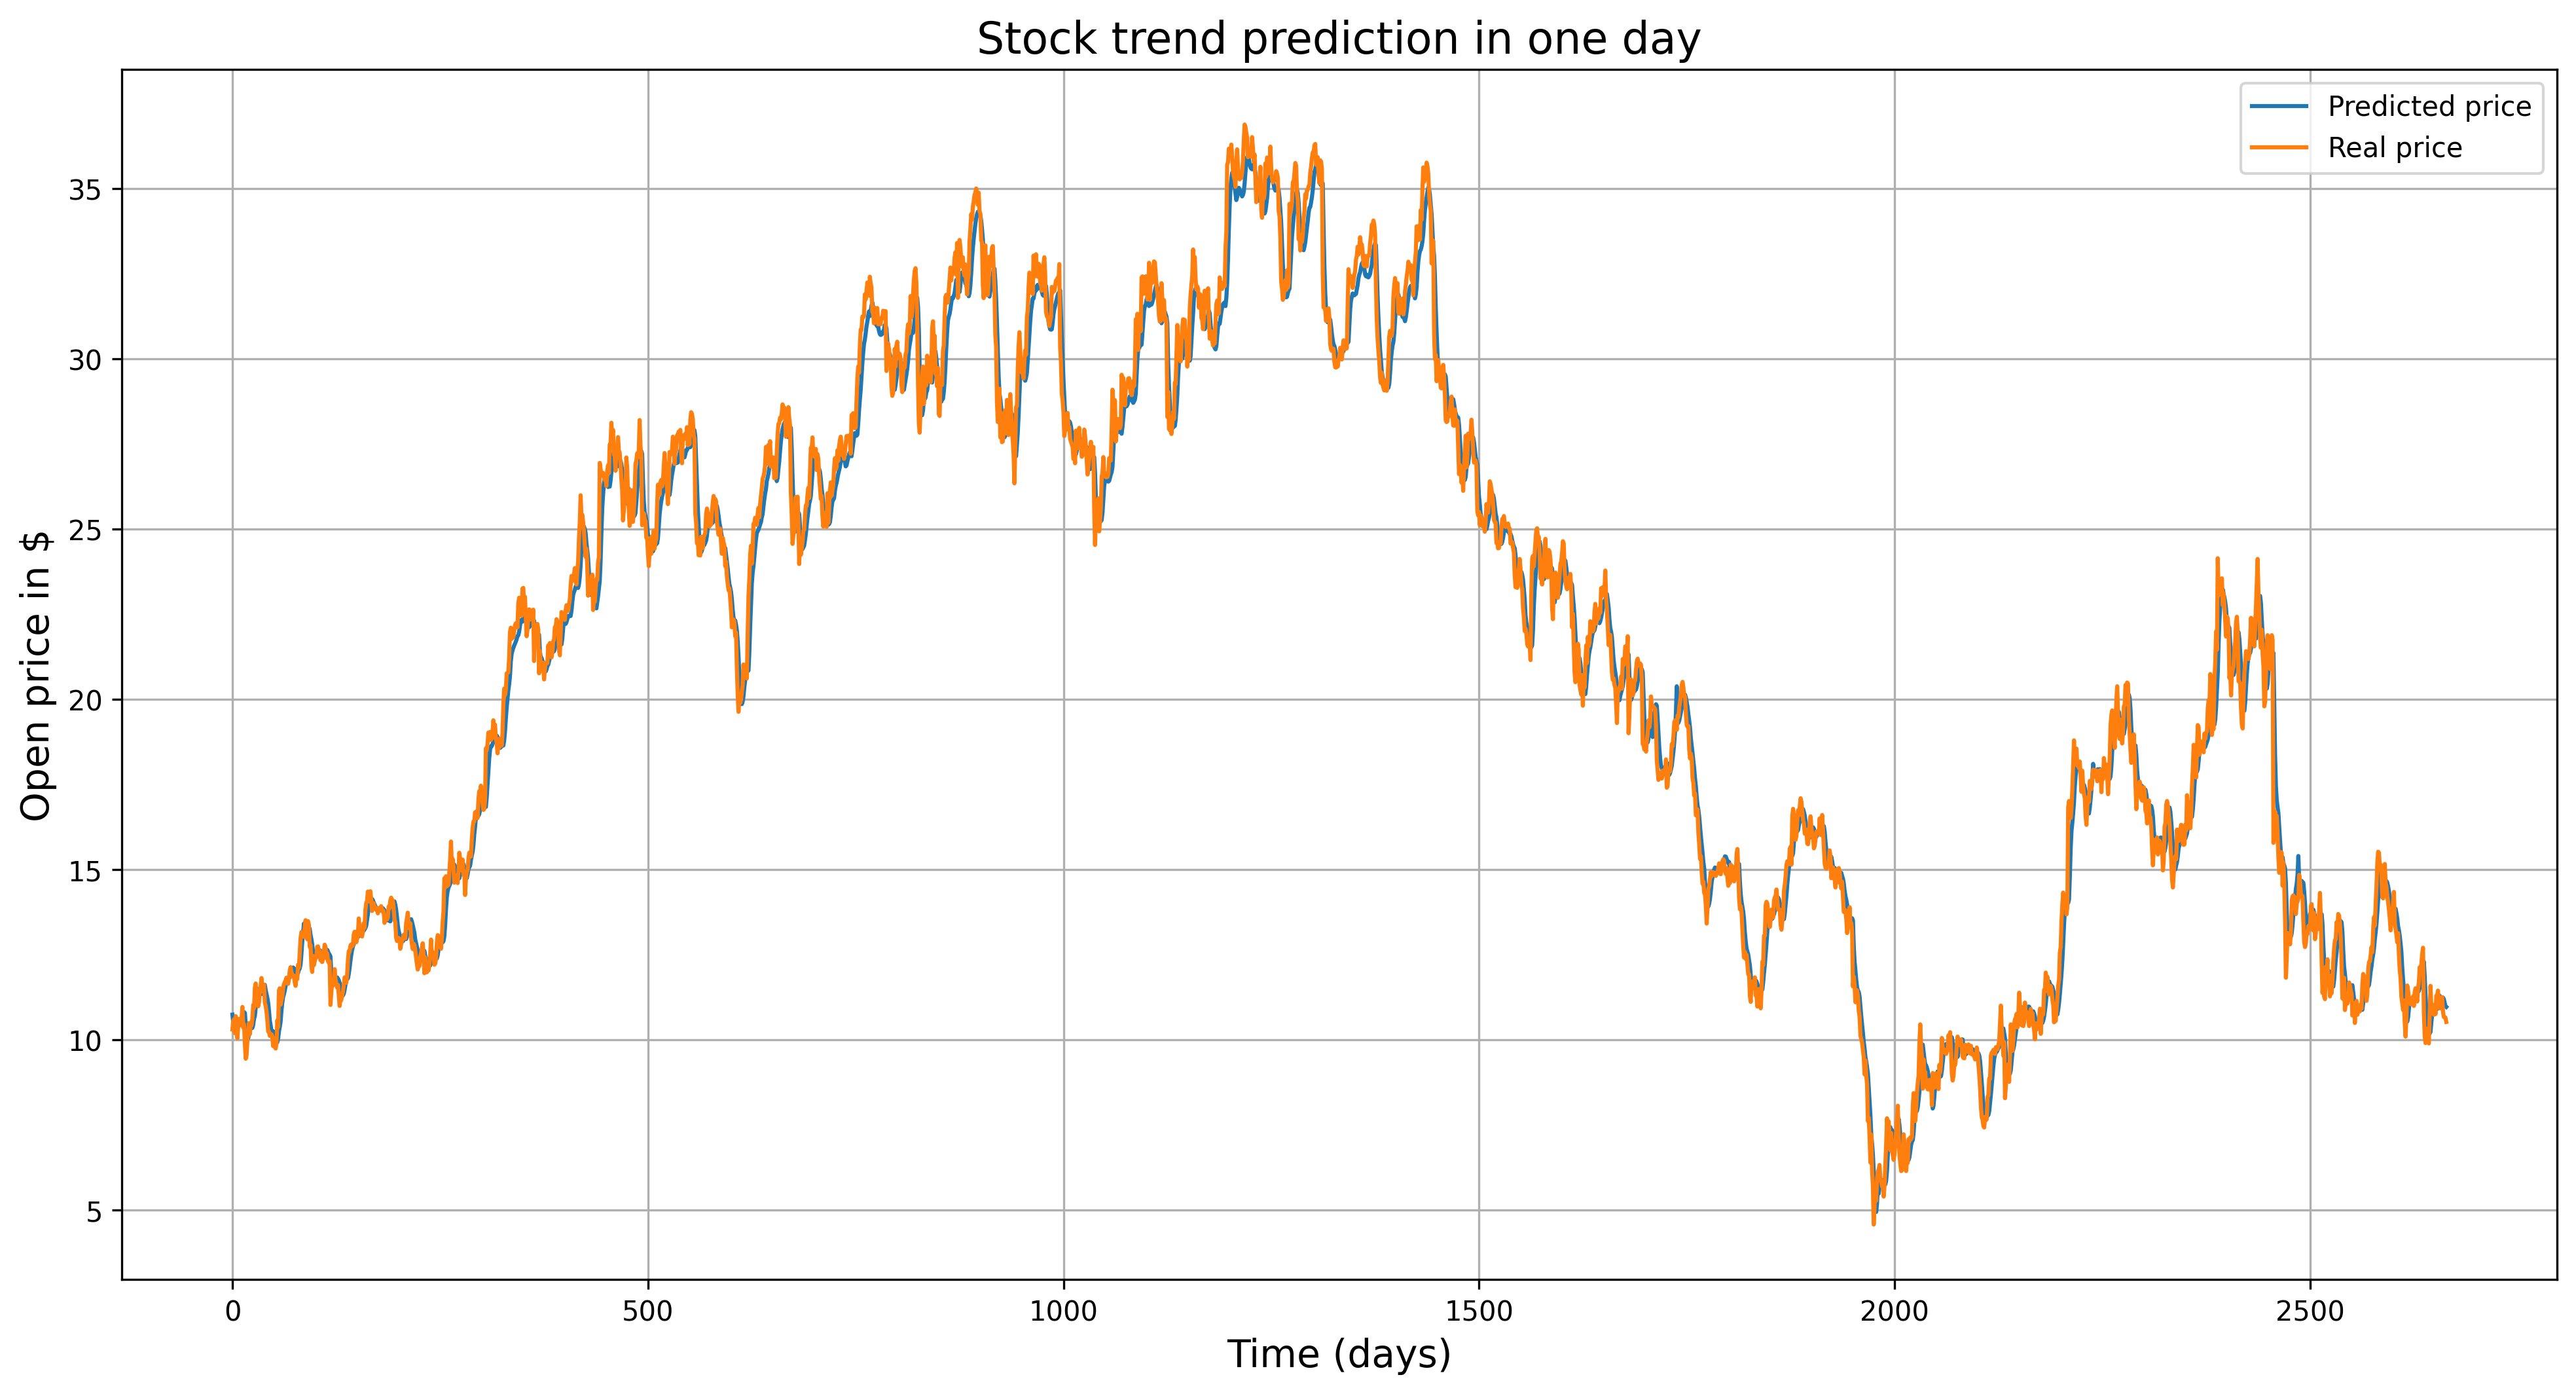

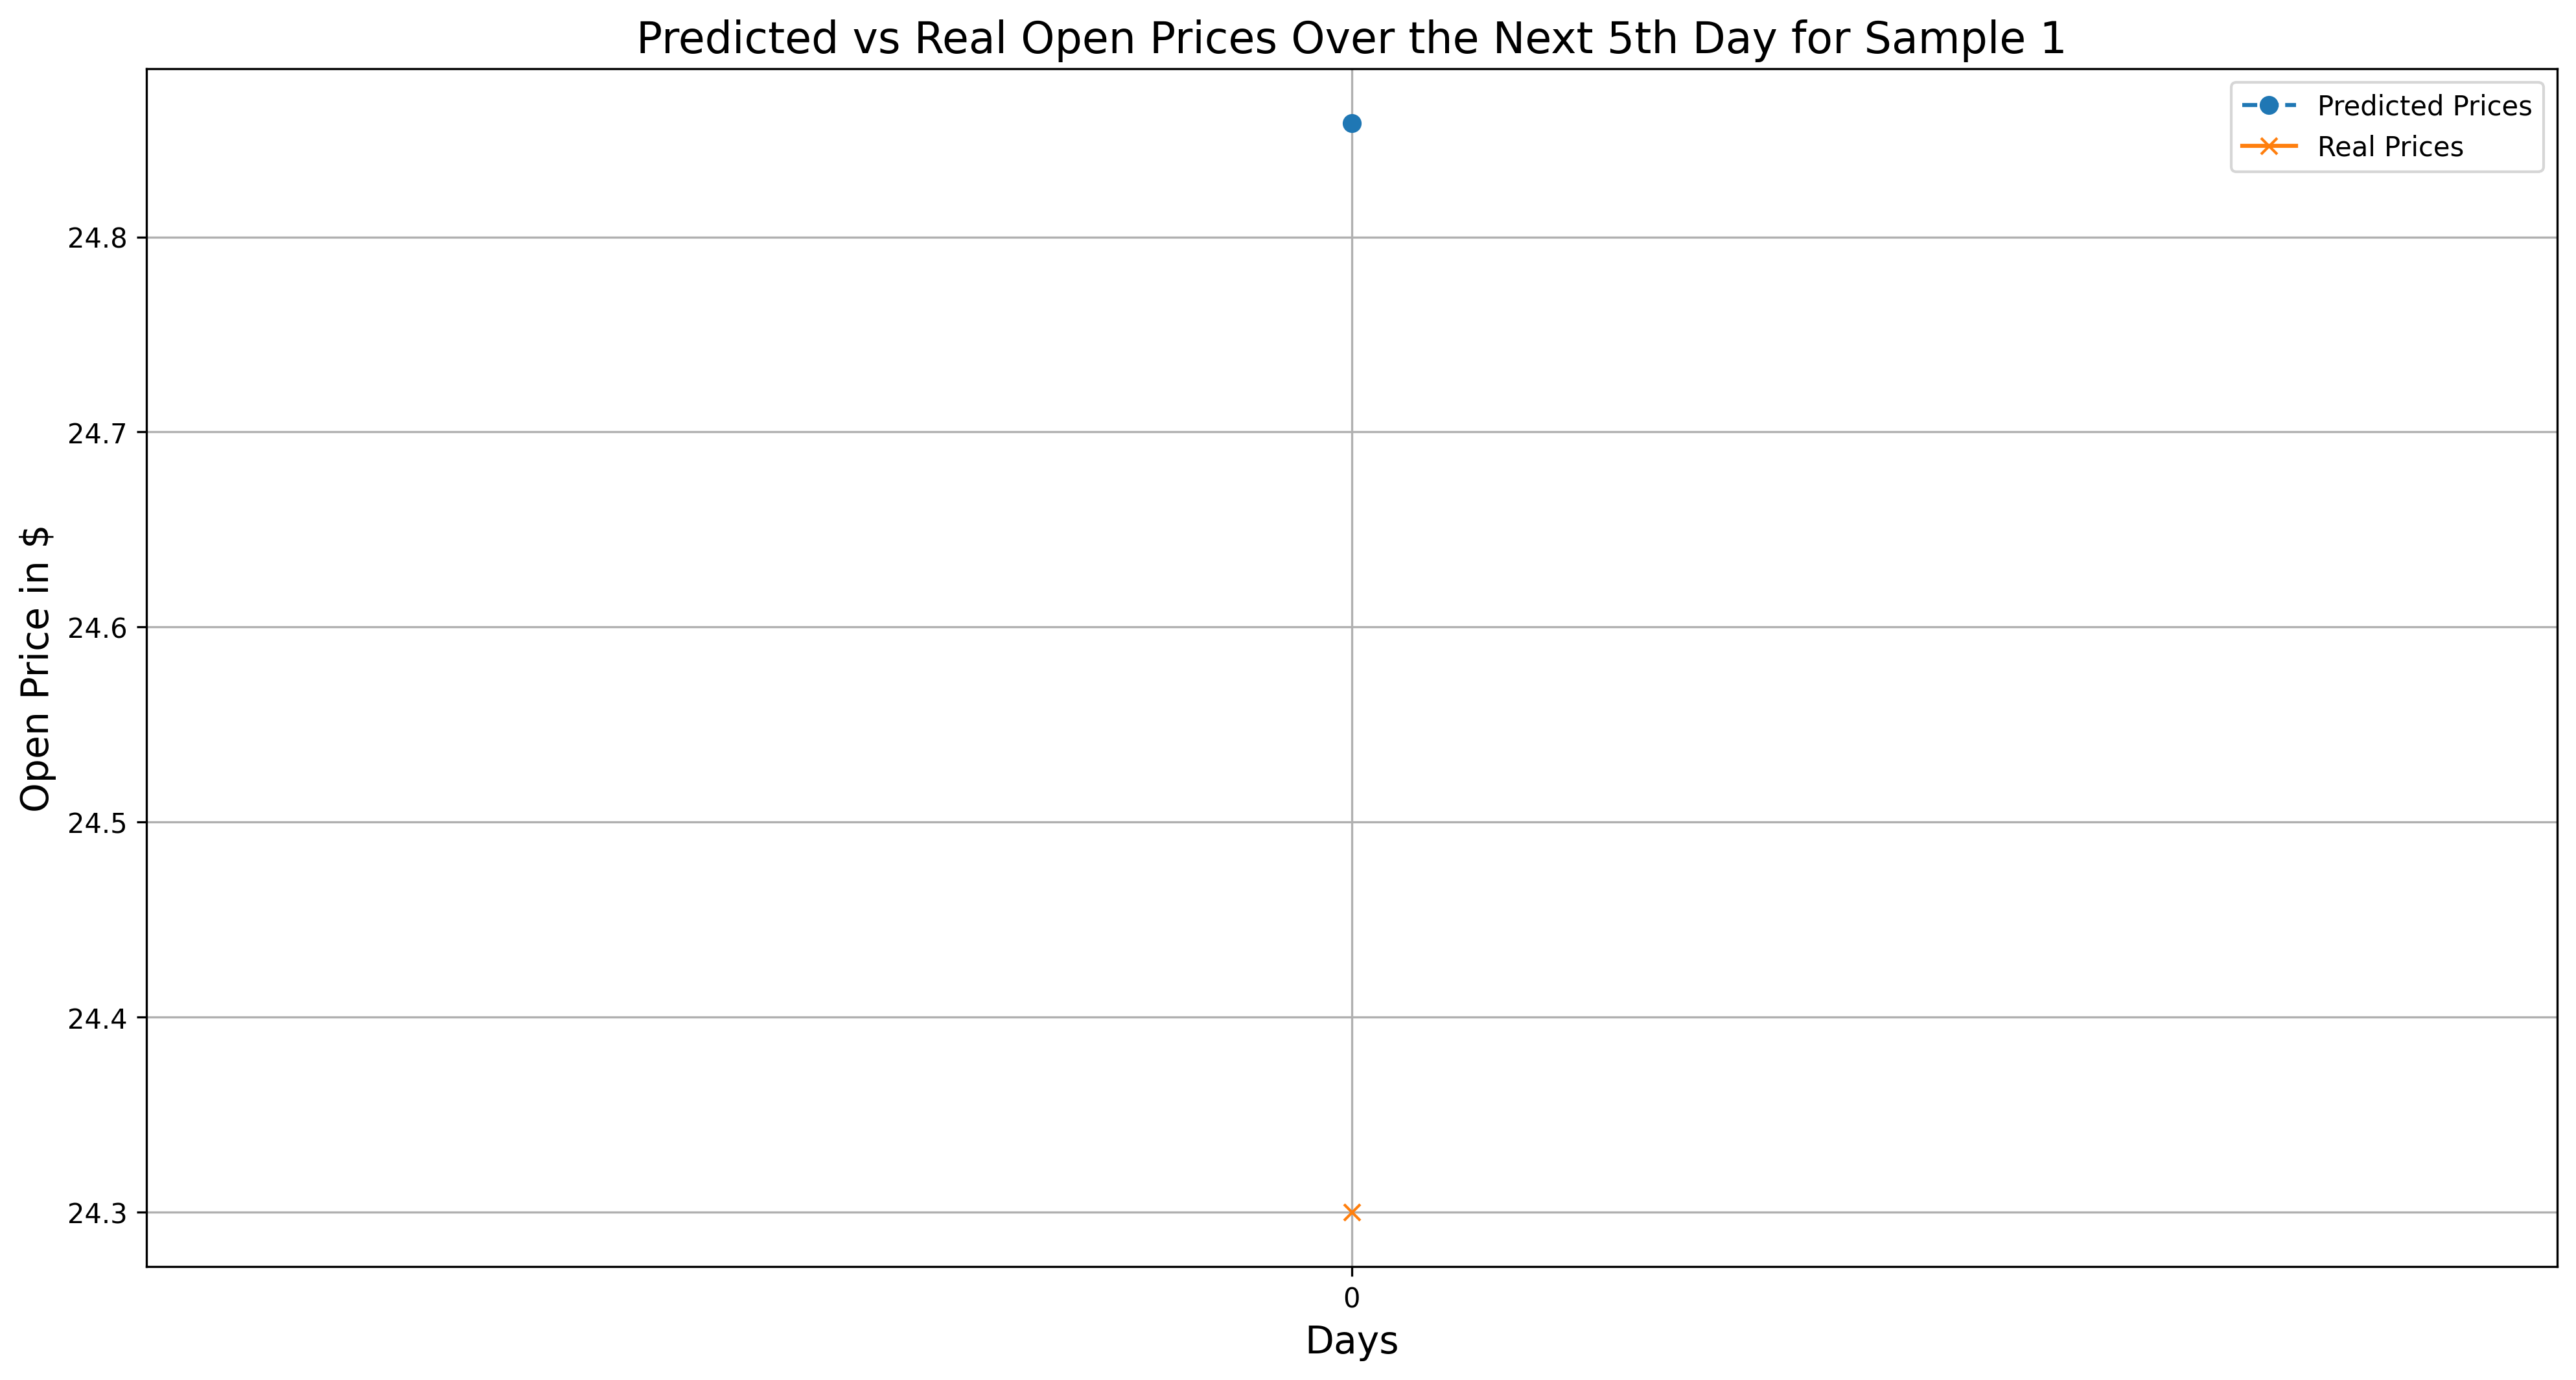

In [ ]:
plot_prediction(y_pred_denom_bigru_ts, y_test, "BiGRU")
plot_prediction_timestep(y_pred_denom_bigru_ts, y_test, "BiGRU")

In [ ]:
stop here if only want to train with time series split

# normal train

In [ ]:
splited_sets = pp.split_data(X_data, y_data)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [ ]:
y_train.shape

(8528, 1)

In [ ]:
y_train

array([[13.25 ],
       [13.375],
       [13.125],
       ...,
       [ 6.57 ],
       [ 6.57 ],
       [ 6.33 ]])

In [ ]:
# Reshape the numpy array to fit the neural network input shape requirement
window_size = 30
X_train = X_train.reshape(X_train.shape[0], window_size, 6)
X_val = X_val.reshape(X_val.shape[0], window_size, 6)
X_test = X_test.reshape(X_test.shape[0], window_size, 6)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)

Shape of training set:  (8528, 30, 6)
Shape of validation set:  (2132, 30, 6)
Shape of test set:  (2665, 30, 6)

Shape of training set:  (8528, 1)
Shape of validation set:  (2132, 1)
Shape of test set:  (2665, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (8528, 30, 6)
Shape of scaled validation set:  (2132, 30, 6)
Shape of scaled test set:  (2665, 30, 6)

Shape of scales training label  (8528, 1)
Shape of scales validation label  (2132, 1)
Shape of scales test label  (2665, 1)


## train

In [ ]:
# Compile and train Convo1D
'''
optimizer = Nadam(learning_rate=0.001)
compile(model_1d, optimizer)
callbacks = get_callbacks(file_path='model_1d.keras')
history_1d = train_history(model_1d,batch_size=2048, epochs=30, callbacks=callbacks,
                           X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                           validation_data=(X_val_norm, y_val_norm))'''

"\noptimizer = Nadam(learning_rate=0.001)\ncompile(model_1d, optimizer)\ncallbacks = get_callbacks(file_path='model_1d.keras')\nhistory_1d = train_history(model_1d,batch_size=2048, epochs=30, callbacks=callbacks,\n                           X_train_norm=X_train_norm, y_train_norm=y_train_norm,\n                           validation_data=(X_val_norm, y_val_norm))"

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bilstm, optimizer)
callbacks = get_callbacks(file_path='model_bilstnm.keras')
history_bilstm = train_history(model_bilstm, batch_size=2048, epochs=30, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - loss: 2.2828 - mae: 0.8958 - val_loss: 0.0030 - val_mae: 0.0471 - learning_rate: 0.0100
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step - loss: 0.0220 - mae: 0.1124 - val_loss: 0.0078 - val_mae: 0.0614 - learning_rate: 0.0100
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - loss: 0.0101 - mae: 0.0711 - val_loss: 0.0080 - val_mae: 0.0704 - learning_rate: 0.0100
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - loss: 0.0110 - mae: 0.0751 - val_loss: 0.0028 - val_mae: 0.0434 - learning_rate: 0.0100
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - loss: 0.0029 - mae: 0.0405 - val_loss: 0.0014 - val_mae: 0.0305 - learning_rate: 0.0100
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - loss: 0.0043 - mae: 0.0530 - val_loss: 0.0041 - val_mae: 0.0546 - learning_rate: 0.0100
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - loss: 0.0022 - mae: 0.0344 - val_loss: 0.0023 - val_mae: 0.0384 - learning_rate: 0.0100
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# COmpile and train BiGRU
from tensorflow.keras.optimizers import Adam, SGD, Nadam
optimizer = Nadam(learning_rate=0.001)
compile(model_bigru, optimizer=optimizer)
callbacks = get_callbacks(file_path='model_bigru.keras')
history_gru = train_history(model_bigru,batch_size=2048, epochs=30, callbacks=callbacks,
                            X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                            validation_data=(X_val_norm, y_val_norm))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - loss: 0.0130 - mae: 0.0601 - val_loss: 0.0012 - val_mae: 0.0293 - learning_rate: 0.0010
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 0.0013 - mae: 0.0250 - val_loss: 3.1174e-04 - val_mae: 0.0130 - learning_rate: 0.0010
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 5.3007e-04 - mae: 0.0153 - val_loss: 3.1746e-04 - val_mae: 0.0130 - learning_rate: 0.0010
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 4.9345e-04 - mae: 0.0144 - val_loss: 2.9299e-04 - val_mae: 0.0129 - learning_rate: 0.0010
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - loss: 4.5518e-04 - mae: 0.0141 - val_loss: 2.6036e-04 - val_mae: 0.0118 - learning_rate: 0.0010
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - loss: 4.4011e-04 - mae: 0.0135 - val_loss: 2.9364e-04 - val_mae: 0.0131 - learning_rate: 5.0000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - loss: 3.8820e-04 - mae: 0.0127 - val_loss: 2.8822e-04 - val_mae: 0.0132 - learning

##plot performance

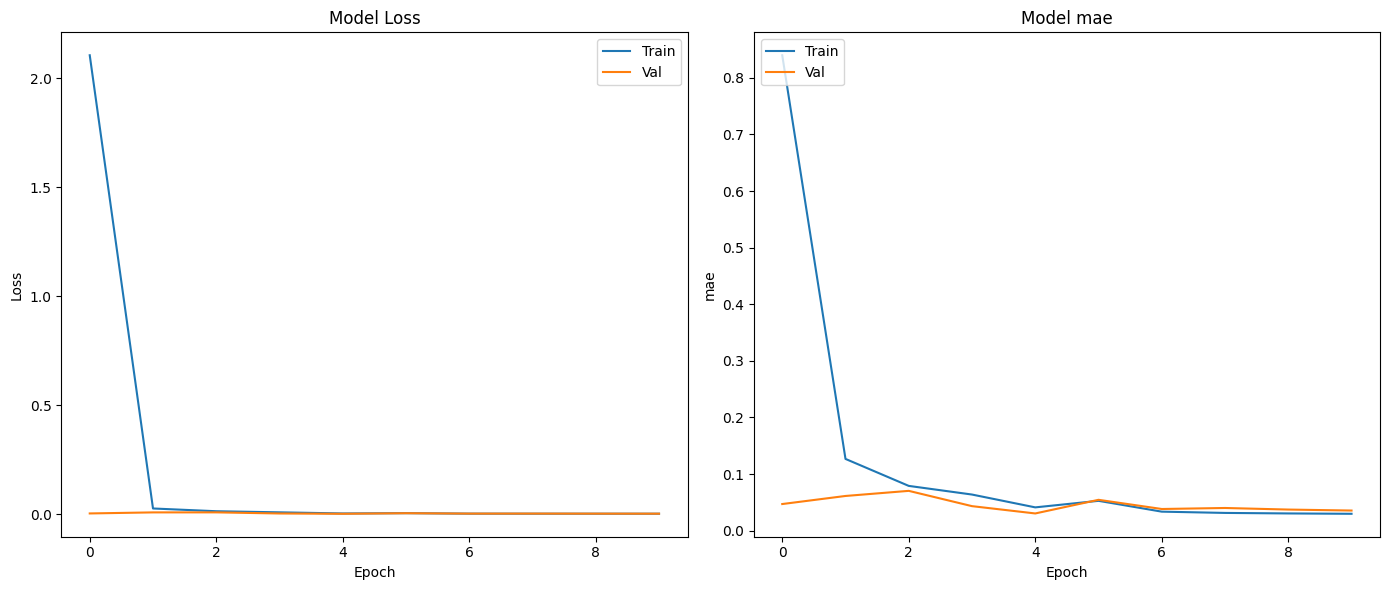

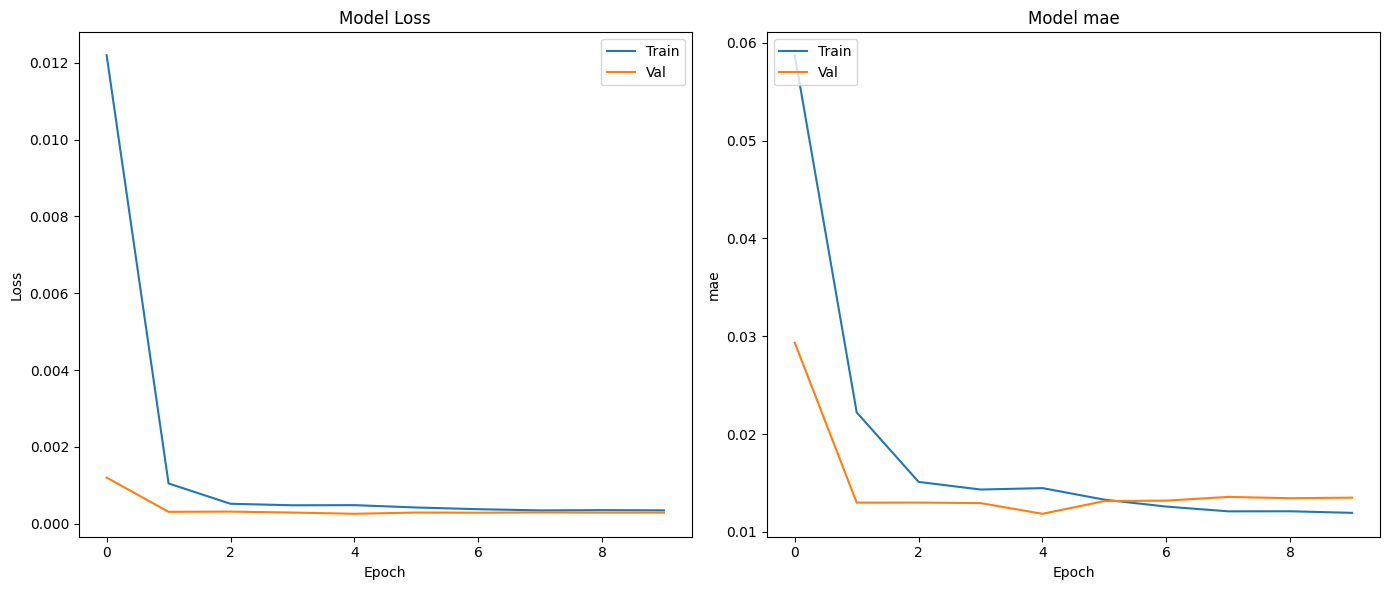

In [ ]:
#plot_performance(history_1d)
plot_performance(history_bilstm)
plot_performance(history_gru)

## Evaluation

In [ ]:
'''print("========Convo1d===========")
model_1d = get_model_n_evaluate("/content/model_1d.keras", X_test_norm, y_test_norm)
y_pred_denom_1d = get_reverse_prediction(model_1d, X_test_norm, y_scaler)
print()'''

print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstnm.keras", X_test_norm, y_test_norm)
y_pred_denom_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denom_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)

=========BiLSTM===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 9.5657e-04 - mae: 0.0254
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0011250906391069293, mae = 0.02633606269955635
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step
MSE on the test set:  0.0011250907273861303
Shape of denormalized training set:  (2665, 1)

=========BiGRU===========
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 2.1817e-04 - mae: 0.0113
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.00026389709091745317, mae = 0.012583444826304913
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step
MSE on the test set:  0.00026389708205382085
Shape of denormalized training set:  (2665, 1)


In [ ]:
#convo1d: 0.00047 0.0167
#lstm: 0.00036 0.014

## viz prediction

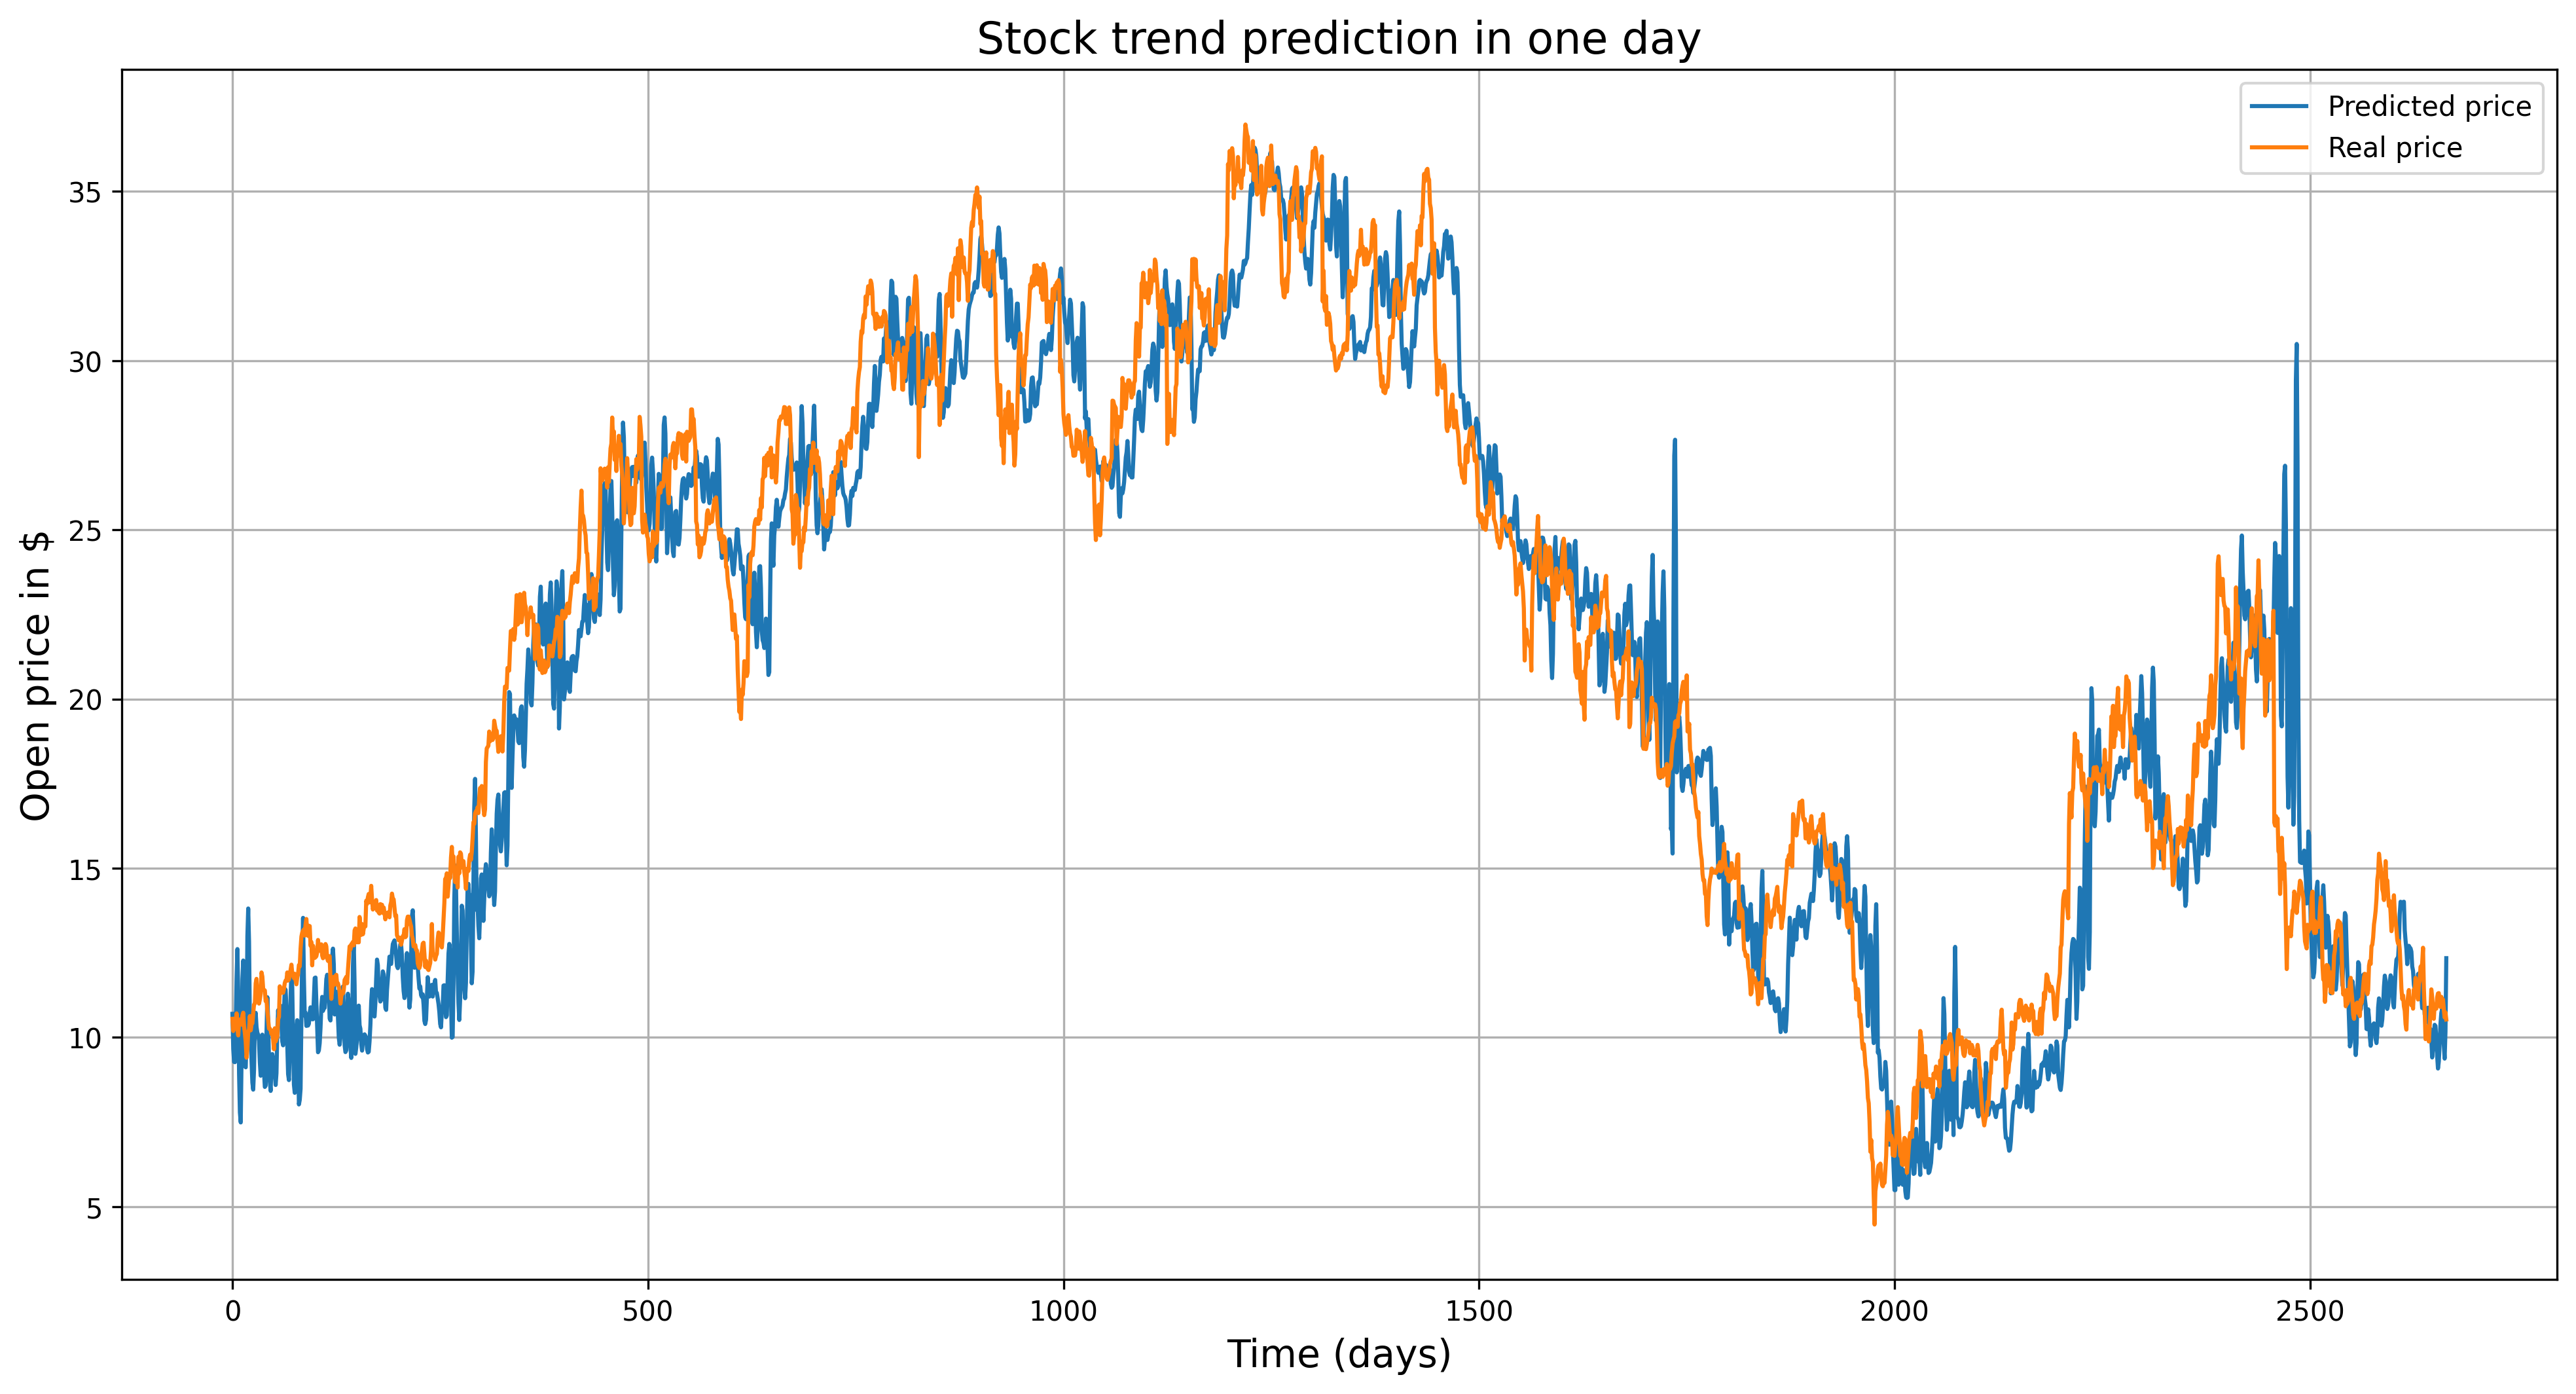

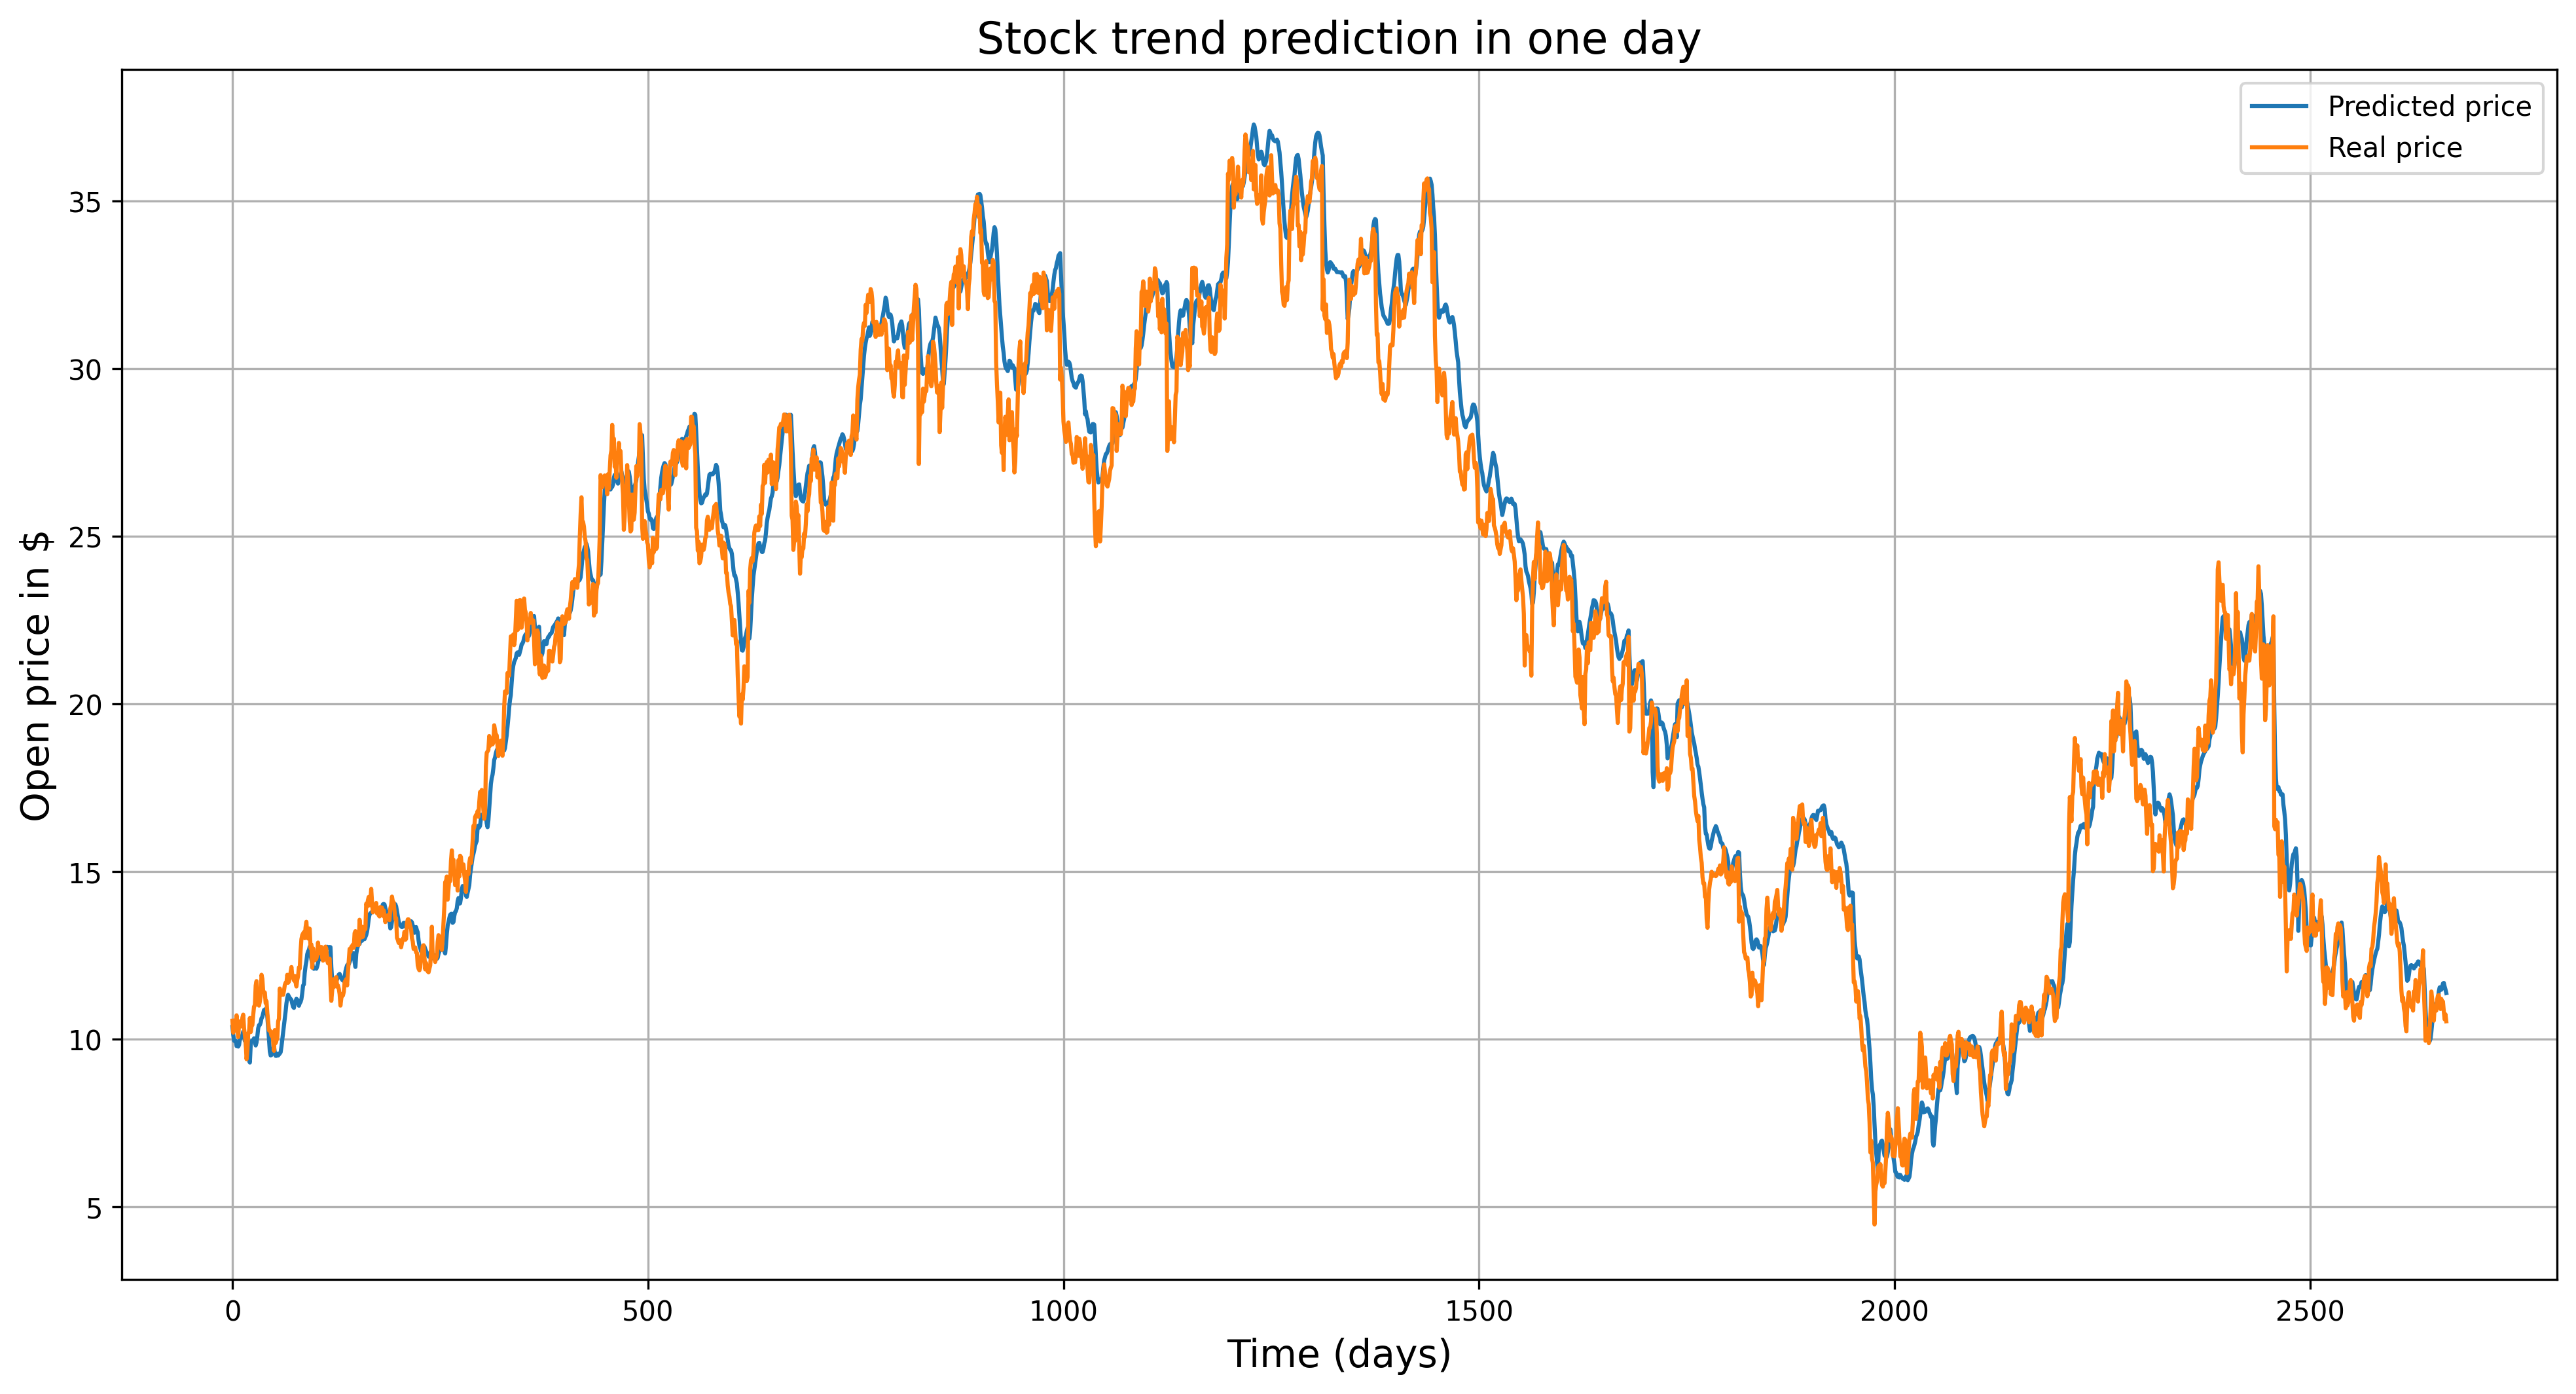

In [ ]:
#plot_prediction(y_pred_denorm_1d, y_test, "Convo1D")
plot_prediction(y_pred_denom_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denom_bigru, y_test, "BiGRU")

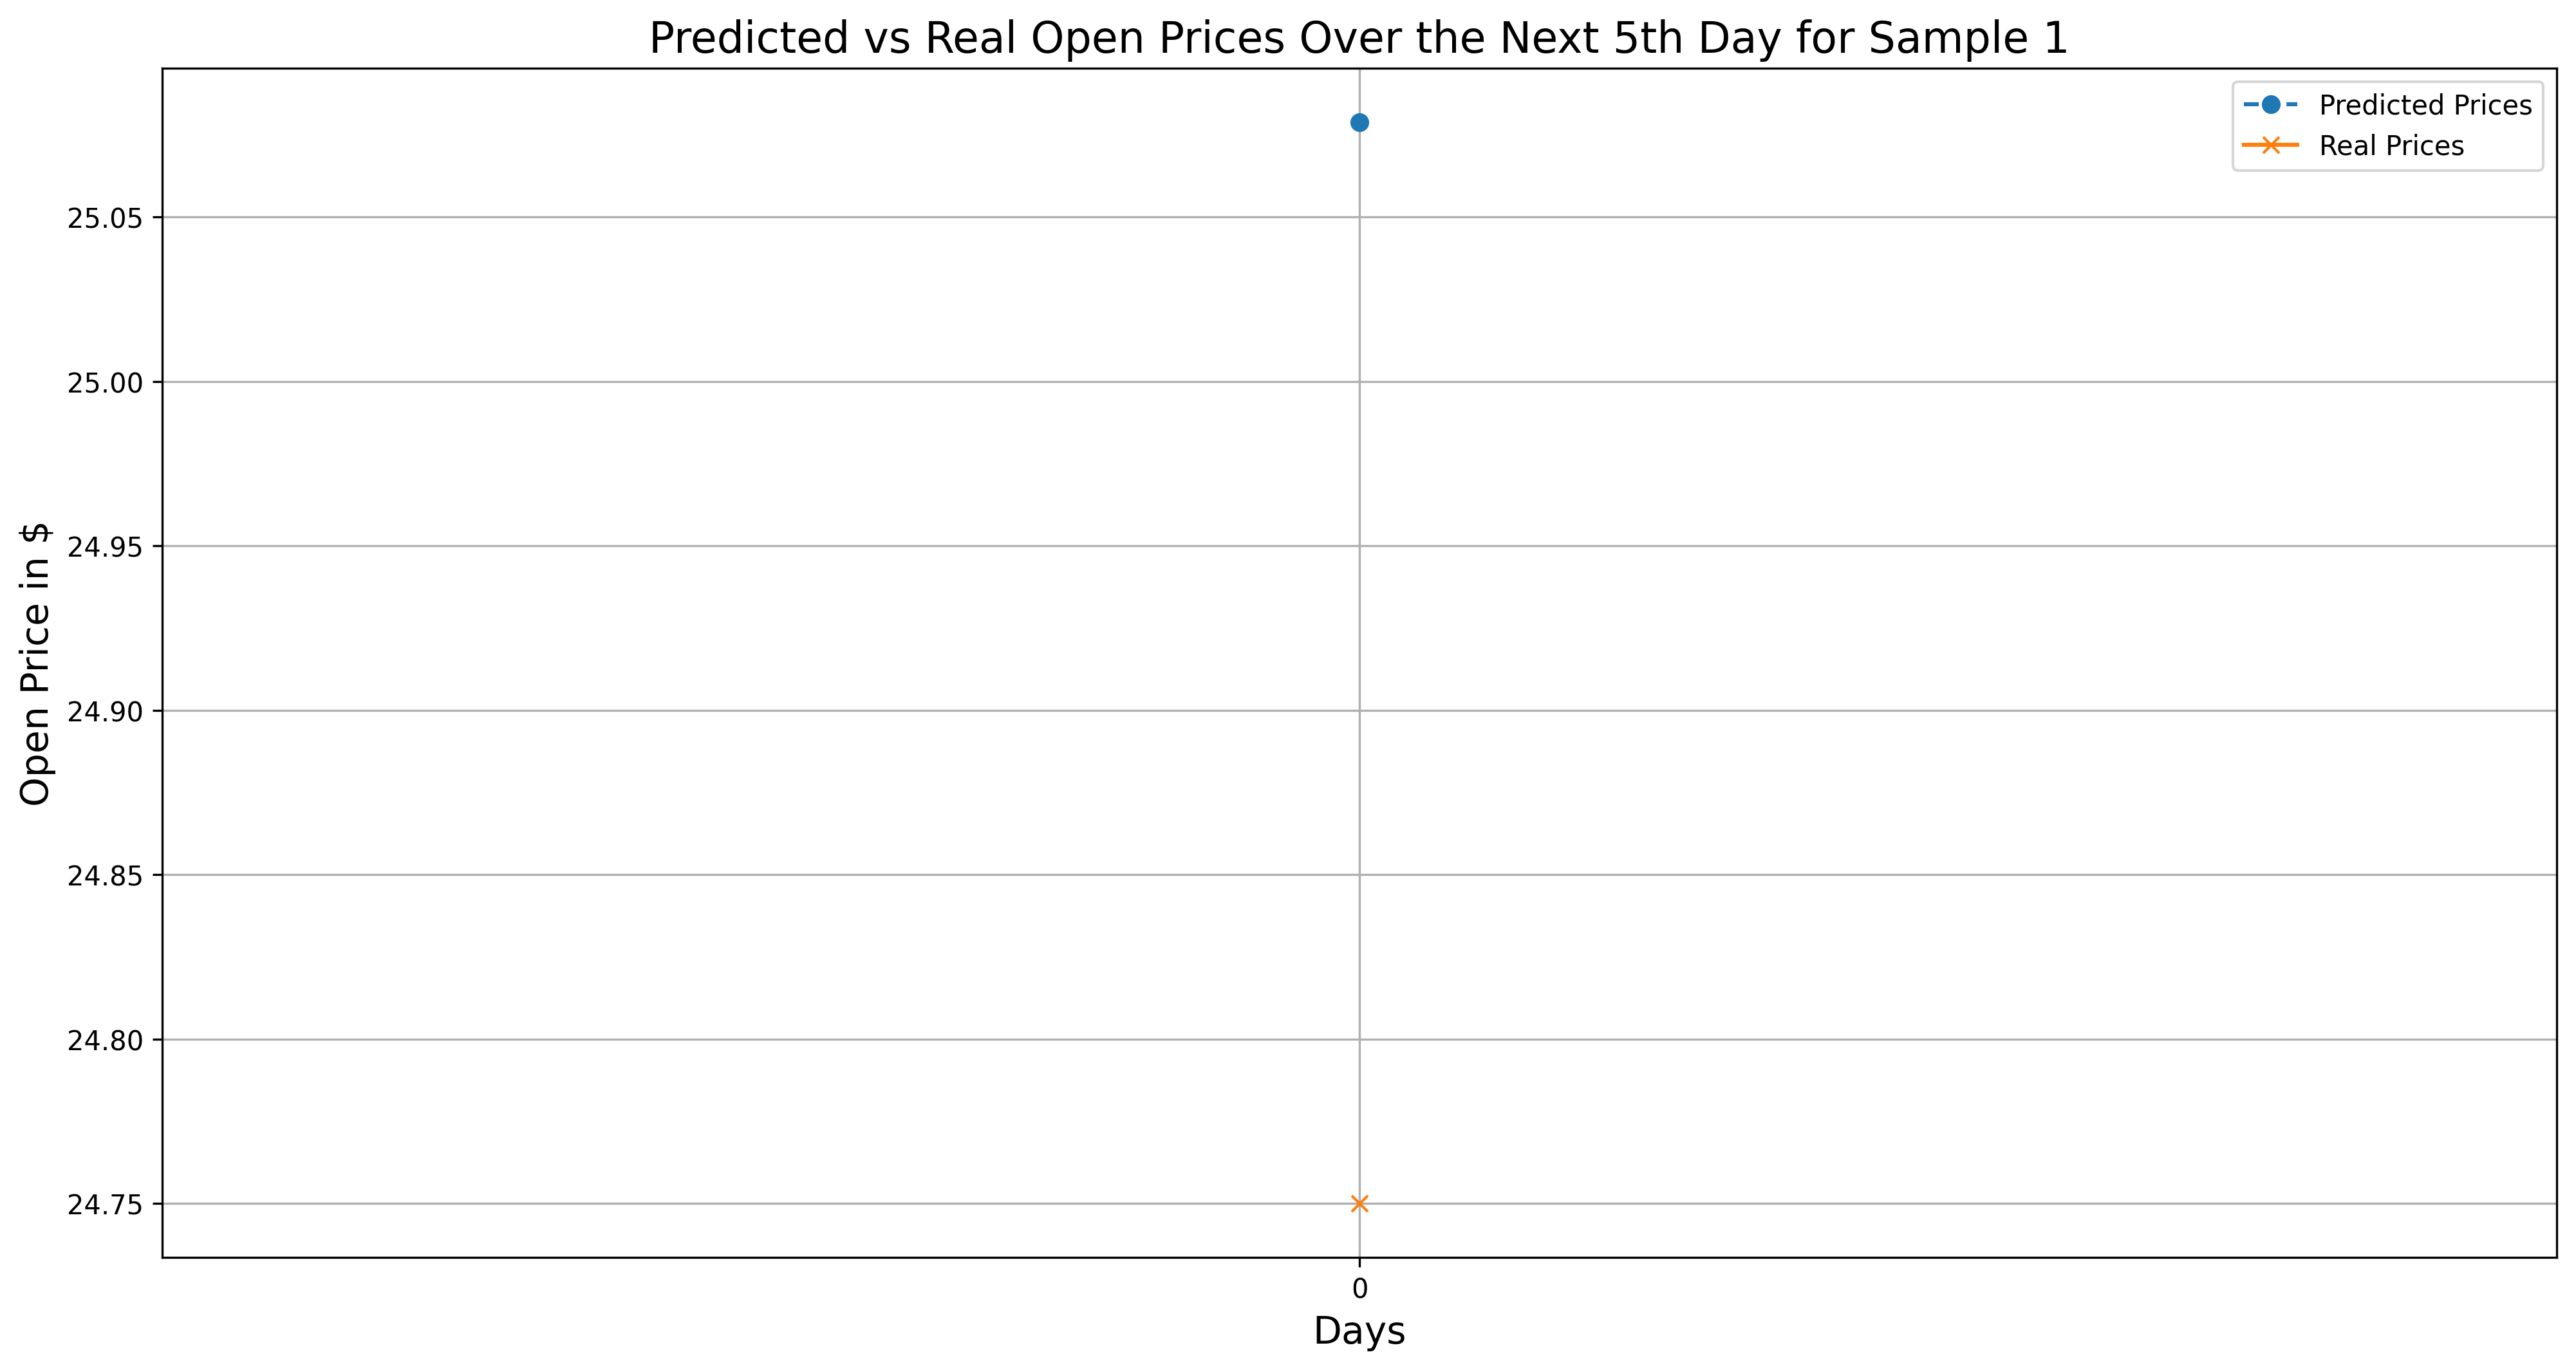

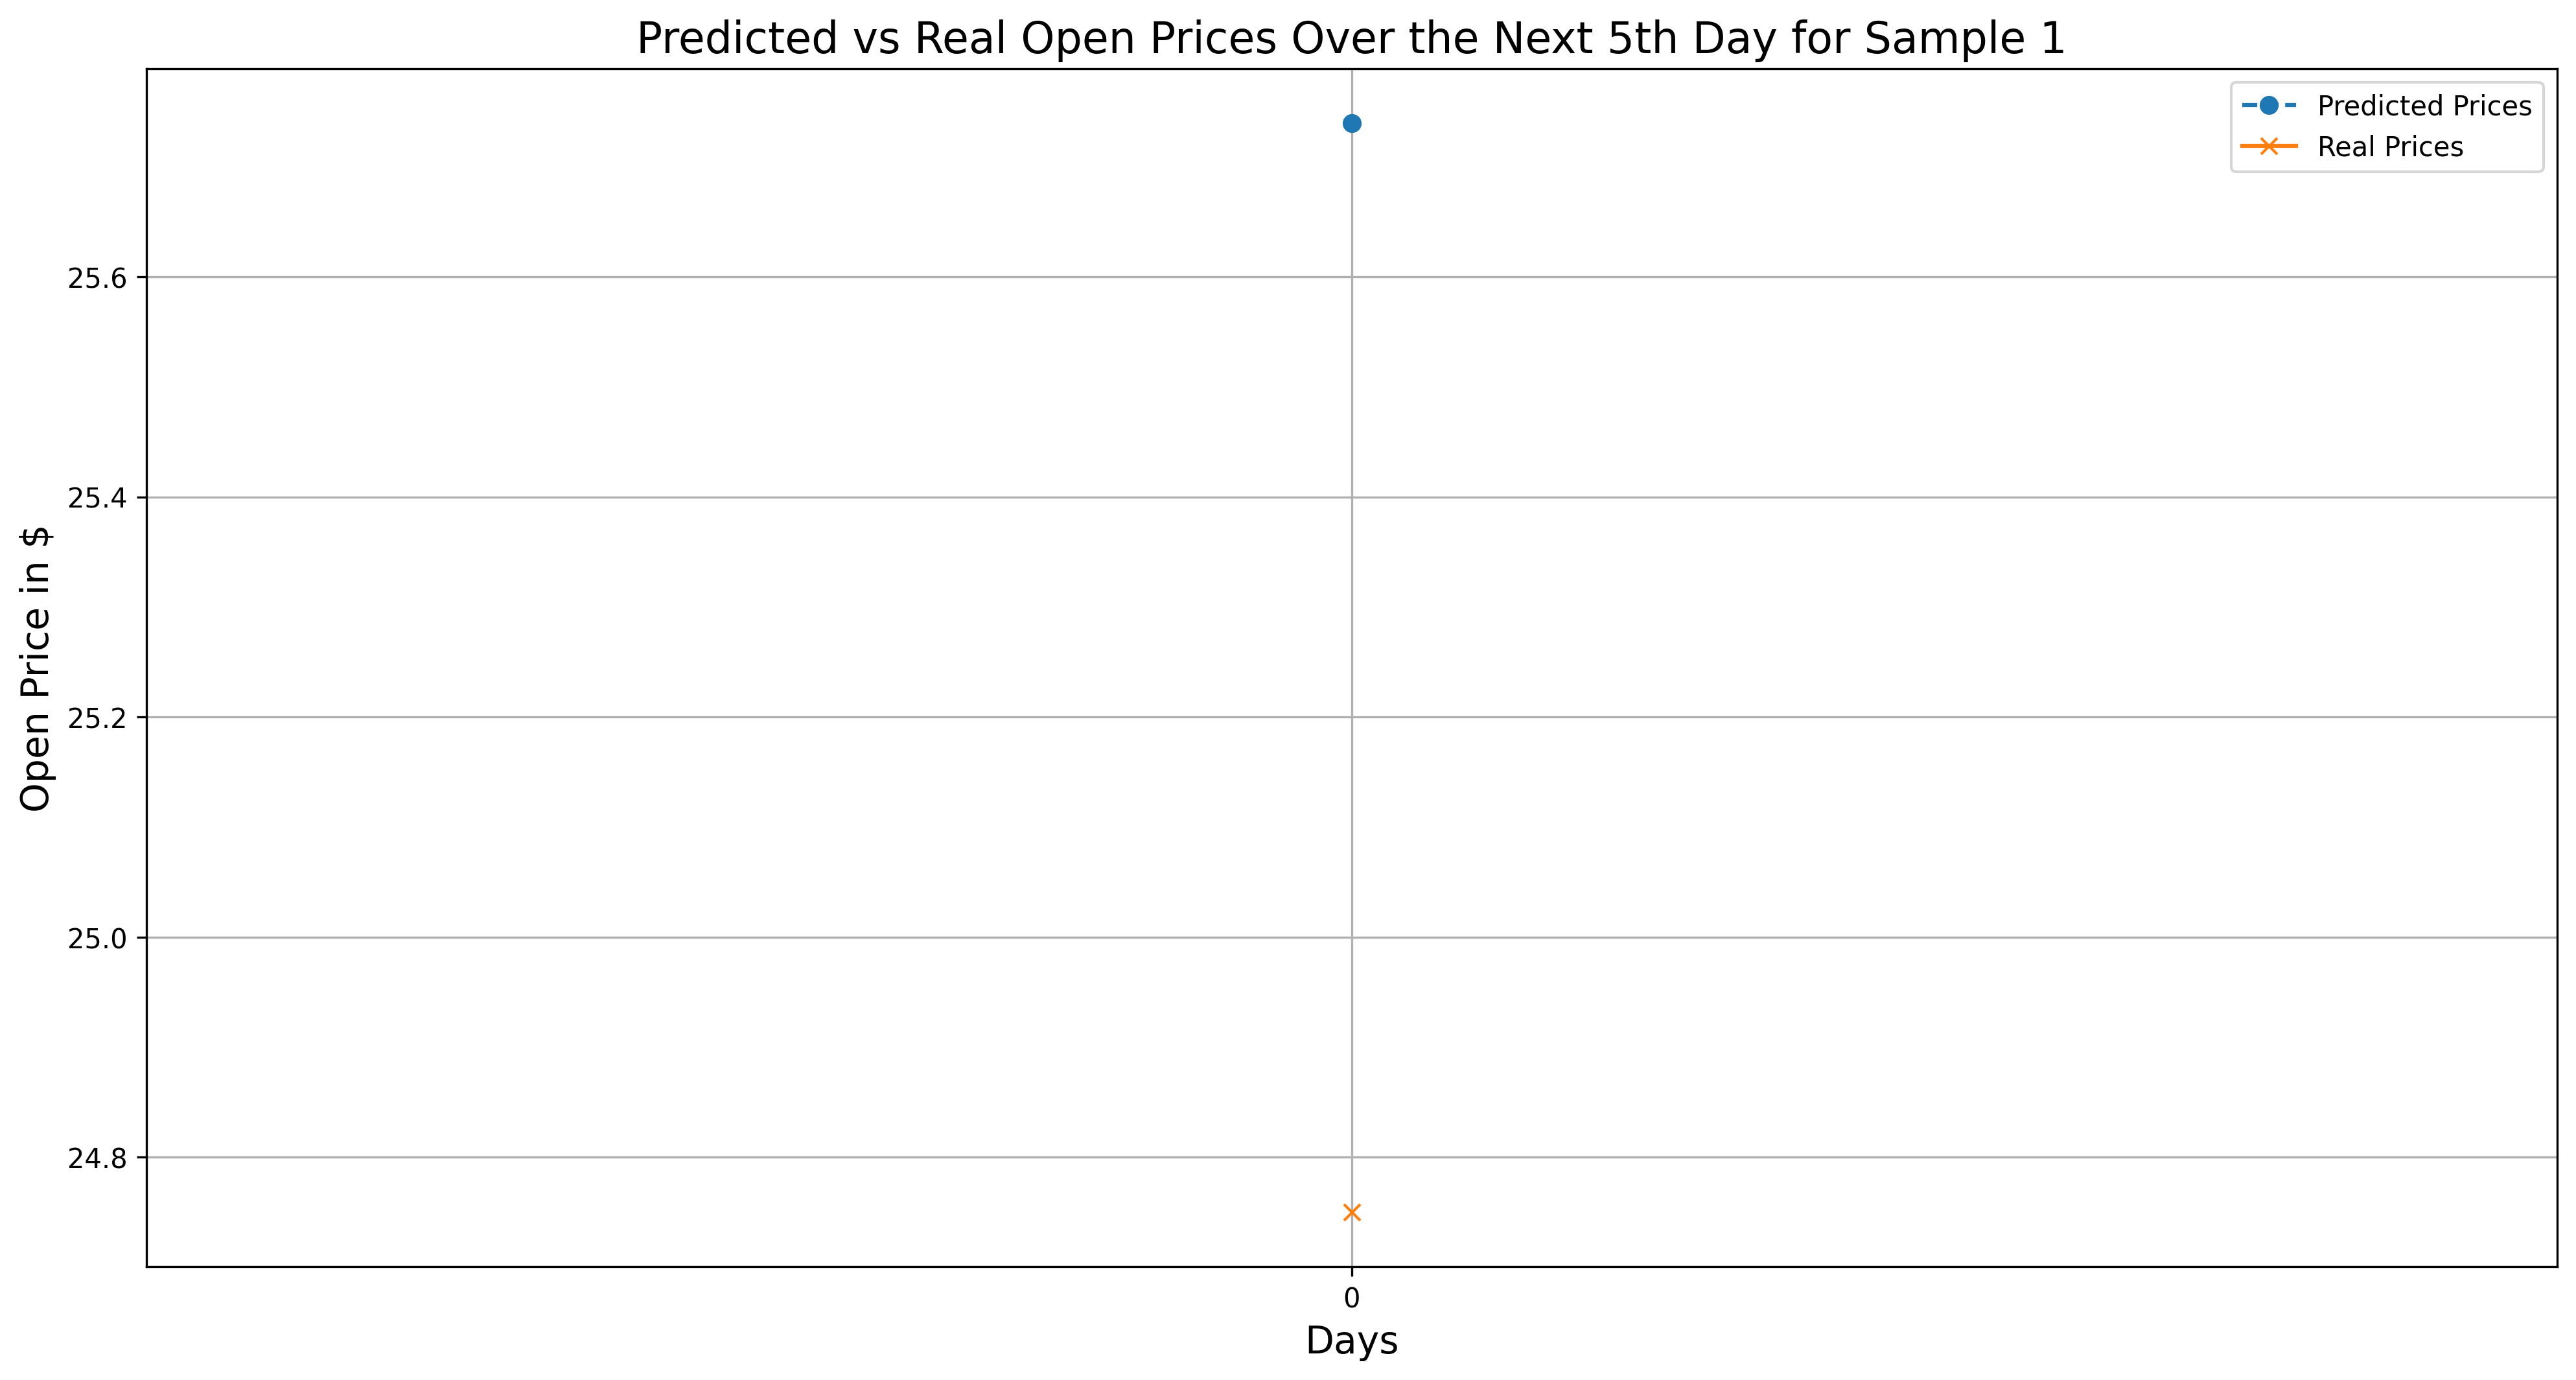

In [ ]:
#plot_prediction_timestep(y_pred_denorm_1d, y_test, "Convo1D")
plot_prediction_timestep(y_pred_denom_bilstm, y_test, "BiLSTM")
plot_prediction_timestep(y_pred_denom_bigru, y_test, "BiGRU")